<div class="alert alert-block alert-info"><font size="6"><b>Sprint 13 Task 1 (S13_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Create an example relational database using a text document or by hand. Design it to contain the following tables, and establish the relationships you consider necessary between them.</SPAN>

I will use Microsoft PowerPoint for this first practice:

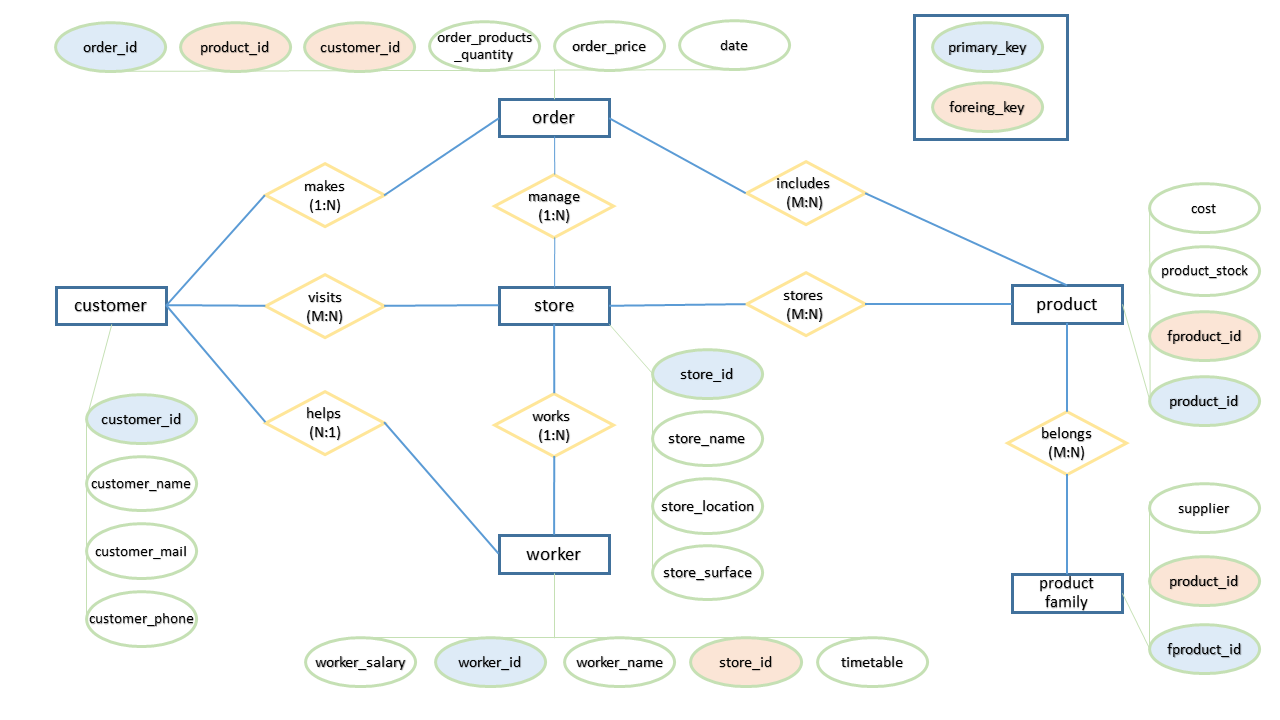

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Use an entity-relationship diagram creation program such as http://dia-installer.de to create the diagram.</SPAN>

After trying several programs/apps, I chose **drawSQL**: 

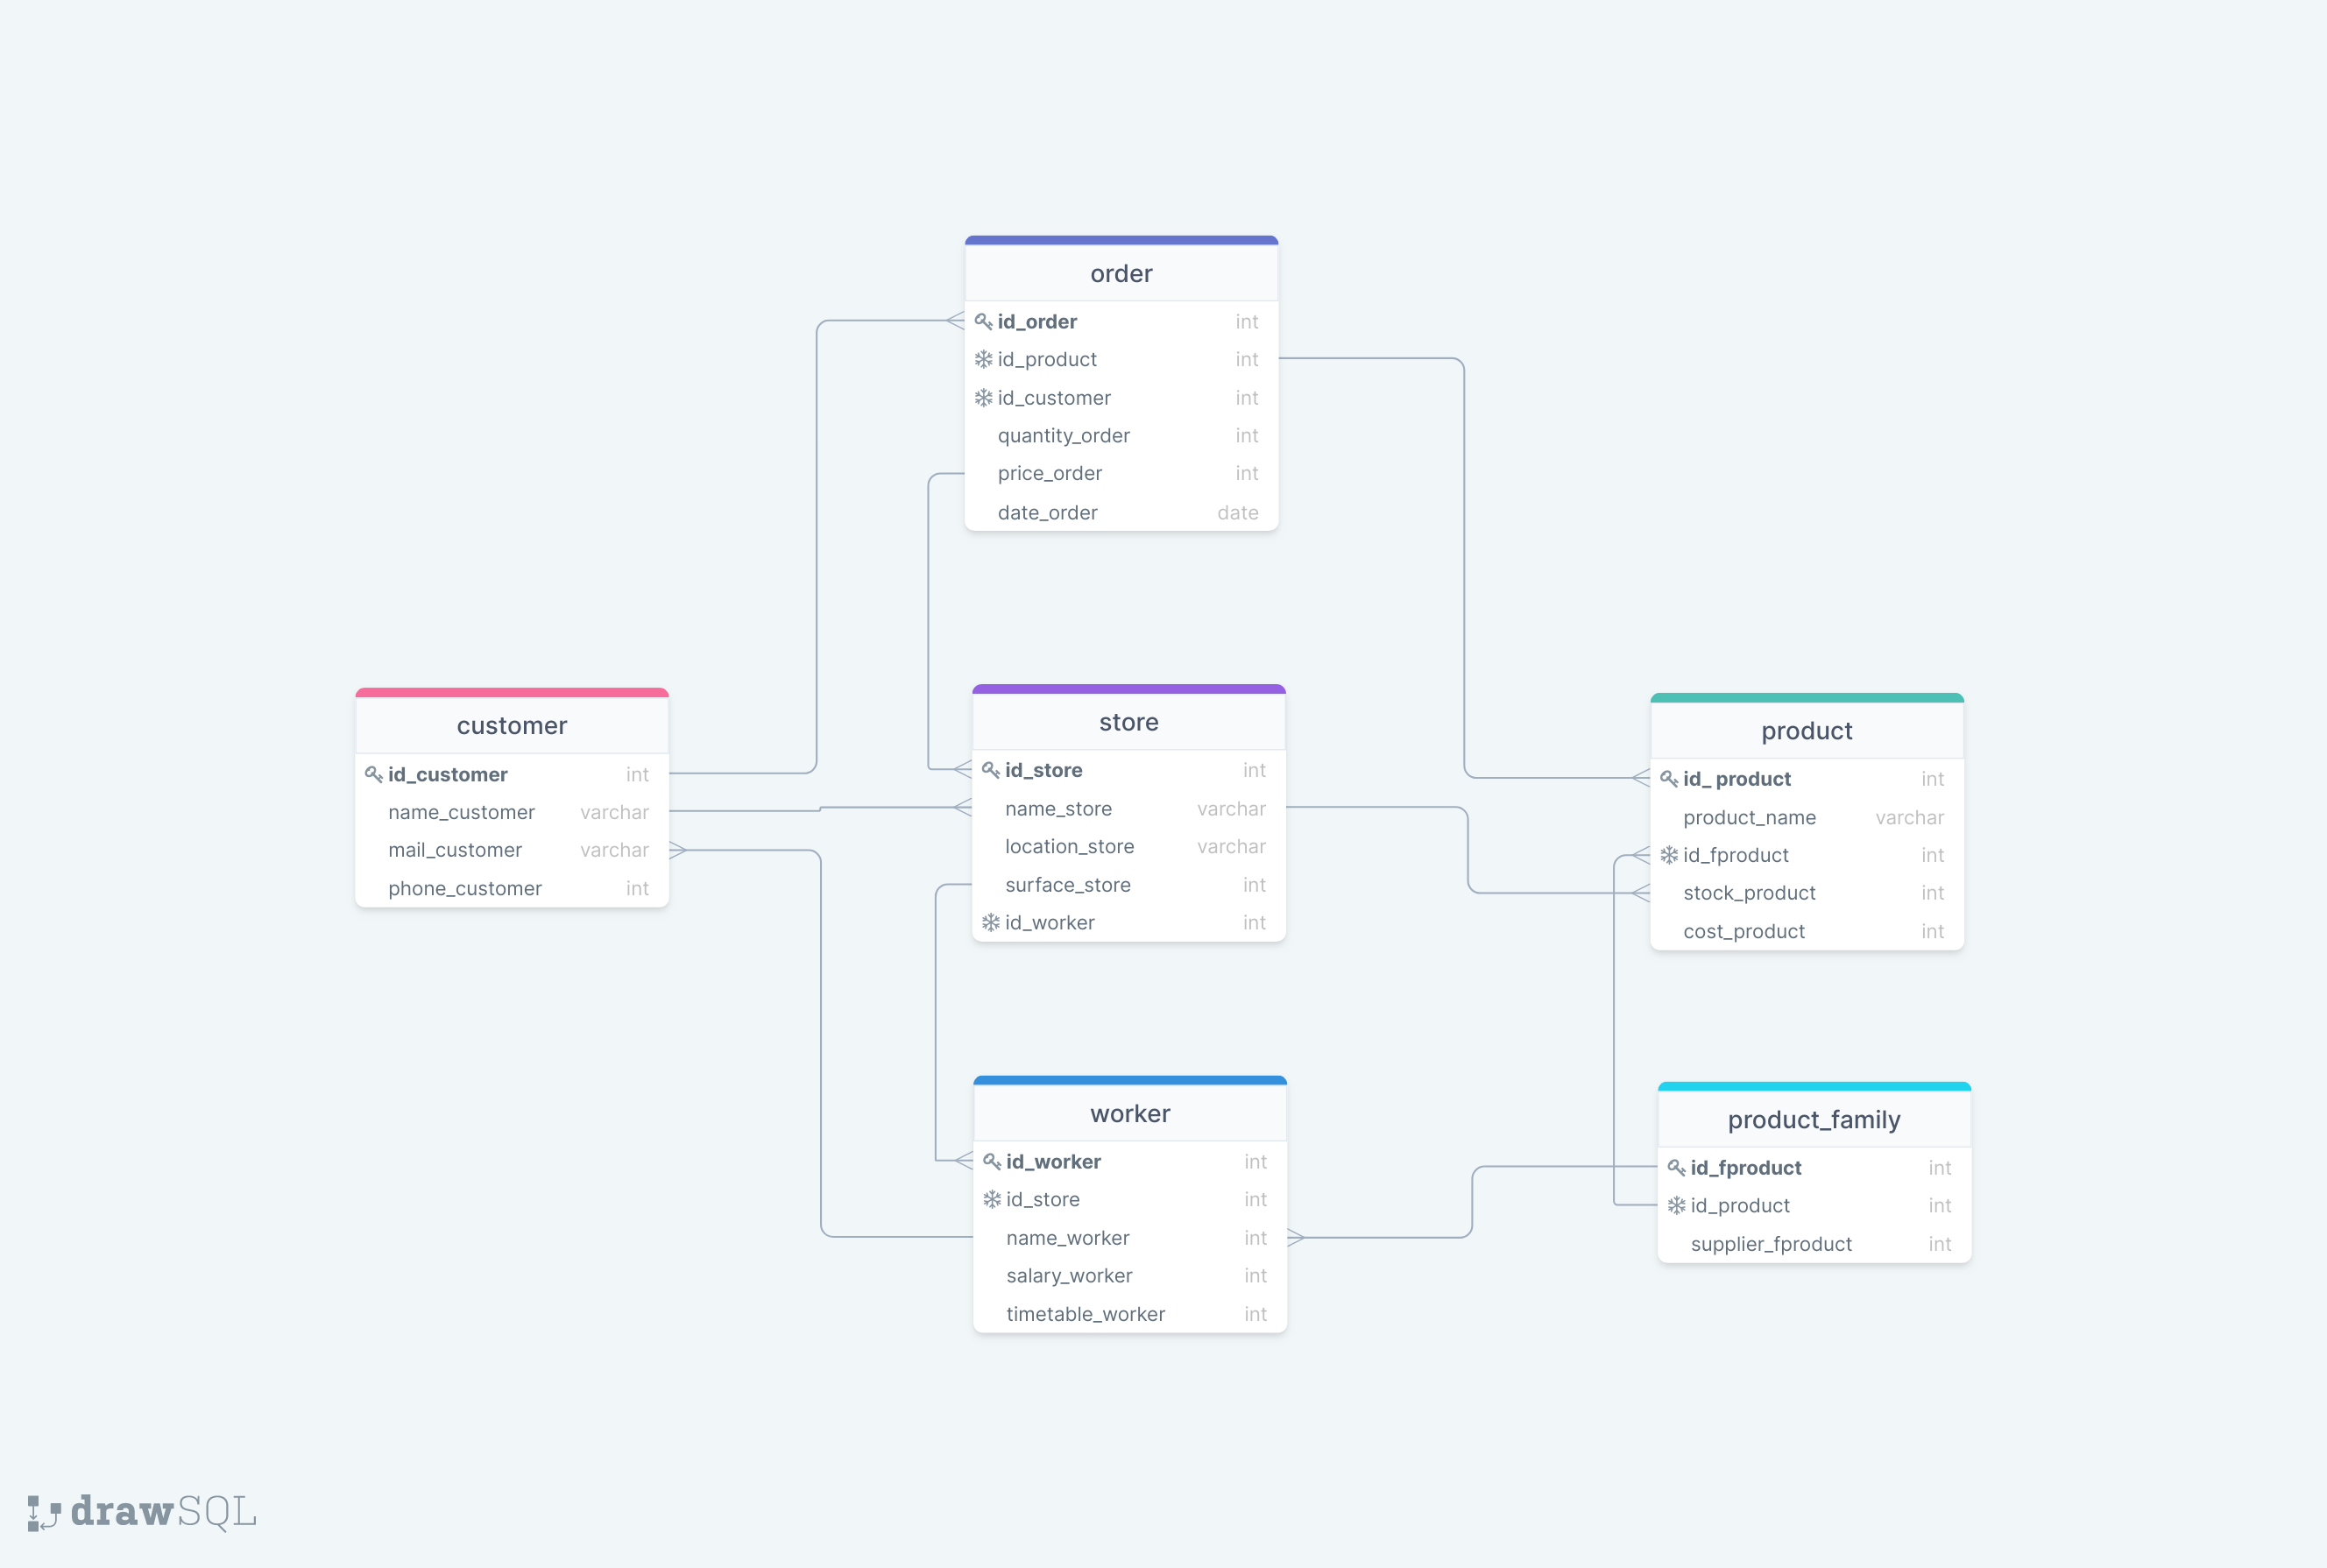

This software allows to export the diagram created to MySQL but I did not use this tool as I wanted to create it from scratch.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Use the MySQL Workbench to create a relational model.</SPAN>

With **MySQL Workbench**:

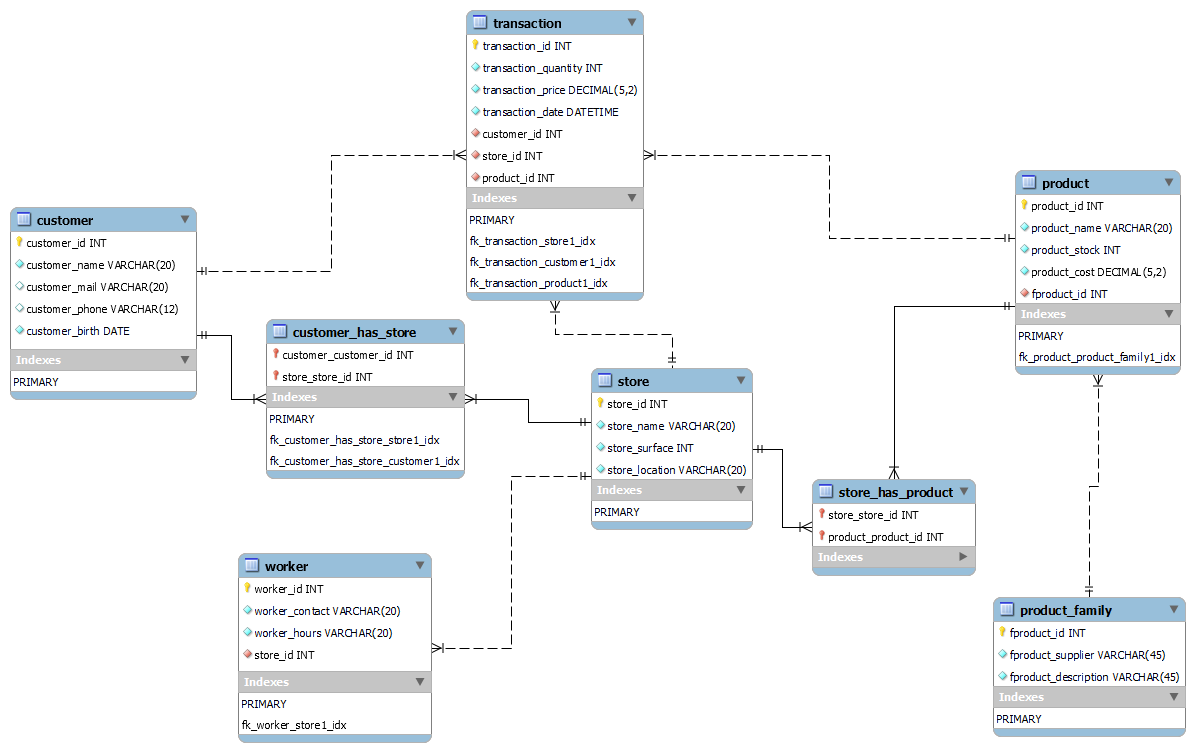

To represent a many-to-many relationships, a junction table is created, that breaks down the many-to-many relationship into two one-to-many relationships.

**SQL Script**: workbench generates the script to be executed on the DB server to create the database.

-- MySQL Workbench Forward Engineering

SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0;
SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0;
SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='ONLY_FULL_GROUP_BY,STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_ENGINE_SUBSTITUTION';

-- -----------------------------------------------------
-- Schema mydb
-- -----------------------------------------------------
-- -----------------------------------------------------
-- Schema S13_T01_ERD
-- -----------------------------------------------------

-- -----------------------------------------------------
-- Schema S13_T01_ERD
-- -----------------------------------------------------
CREATE SCHEMA IF NOT EXISTS `S13_T01_ERD` ;
USE `S13_T01_ERD` ;

-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`customer`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`customer` (
  `customer_id` INT NOT NULL AUTO_INCREMENT,
  `customer_name` VARCHAR(20) NOT NULL,
  `customer_mail` VARCHAR(20) NULL,
  `customer_phone` VARCHAR(12) NULL,
  `customer_birth` DATE NOT NULL,
  PRIMARY KEY (`customer_id`))
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`store`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`store` (
  `store_id` INT NOT NULL AUTO_INCREMENT,
  `store_name` VARCHAR(20) NOT NULL,
  `store_surface` INT NOT NULL,
  `store_location` VARCHAR(20) NOT NULL,
  PRIMARY KEY (`store_id`))
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`product_family`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`product_family` (
  `fproduct_id` INT NOT NULL,
  `fproduct_supplier` VARCHAR(45) NOT NULL,
  `fproduct_description` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`fproduct_id`))
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`product`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`product` (
  `product_id` INT NOT NULL,
  `product_name` VARCHAR(20) NOT NULL,
  `product_stock` INT NOT NULL,
  `product_cost` DECIMAL(5,2) NOT NULL,
  `fproduct_id` INT NOT NULL,
  PRIMARY KEY (`product_id`),
  INDEX `fk_product_product_family1_idx` (`fproduct_id` ASC) VISIBLE,
  CONSTRAINT `fk_product_product_family1`
    FOREIGN KEY (`fproduct_id`)
    REFERENCES `S13_T01_ERD`.`product_family` (`fproduct_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`transaction`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`transaction` (
  `transaction_id` INT NOT NULL AUTO_INCREMENT,
  `transaction_quantity` INT NOT NULL,
  `transaction_price` DECIMAL(5,2) NOT NULL,
  `transaction_date` DATETIME NOT NULL,
  `customer_id` INT NOT NULL,
  `store_id` INT NOT NULL,
  `product_id` INT NOT NULL,
  PRIMARY KEY (`transaction_id`),
  INDEX `fk_transaction_store1_idx` (`store_id` ASC) VISIBLE,
  INDEX `fk_transaction_customer1_idx` (`customer_id` ASC) VISIBLE,
  INDEX `fk_transaction_product1_idx` (`product_id` ASC) VISIBLE,
  CONSTRAINT `fk_transaction_store1`
    FOREIGN KEY (`store_id`)
    REFERENCES `S13_T01_ERD`.`store` (`store_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `fk_transaction_customer1`
    FOREIGN KEY (`customer_id`)
    REFERENCES `S13_T01_ERD`.`customer` (`customer_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `fk_transaction_product1`
    FOREIGN KEY (`product_id`)
    REFERENCES `S13_T01_ERD`.`product` (`product_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`worker`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`worker` (
  `worker_id` INT NOT NULL AUTO_INCREMENT,
  `worker_contact` VARCHAR(20) NOT NULL,
  `worker_hours` VARCHAR(20) NOT NULL,
  `store_id` INT NOT NULL,
  PRIMARY KEY (`worker_id`),
  INDEX `fk_worker_store1_idx` (`store_id` ASC) VISIBLE,
  CONSTRAINT `fk_worker_store1`
    FOREIGN KEY (`store_id`)
    REFERENCES `S13_T01_ERD`.`store` (`store_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`customer_has_store`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`customer_has_store` (
  `customer_customer_id` INT NOT NULL,
  `store_store_id` INT NOT NULL,
  PRIMARY KEY (`customer_customer_id`, `store_store_id`),
  INDEX `fk_customer_has_store_store1_idx` (`store_store_id` ASC) VISIBLE,
  INDEX `fk_customer_has_store_customer1_idx` (`customer_customer_id` ASC) VISIBLE,
  CONSTRAINT `fk_customer_has_store_customer1`
    FOREIGN KEY (`customer_customer_id`)
    REFERENCES `S13_T01_ERD`.`customer` (`customer_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `fk_customer_has_store_store1`
    FOREIGN KEY (`store_store_id`)
    REFERENCES `S13_T01_ERD`.`store` (`store_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;


-- -----------------------------------------------------
-- Table `S13_T01_ERD`.`store_has_product`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `S13_T01_ERD`.`store_has_product` (
  `store_store_id` INT NOT NULL,
  `product_product_id` INT NOT NULL,
  PRIMARY KEY (`store_store_id`, `product_product_id`),
  INDEX `fk_store_has_product_product1_idx` (`product_product_id` ASC) VISIBLE,
  INDEX `fk_store_has_product_store1_idx` (`store_store_id` ASC) VISIBLE,
  CONSTRAINT `fk_store_has_product_store1`
    FOREIGN KEY (`store_store_id`)
    REFERENCES `S13_T01_ERD`.`store` (`store_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION,
  CONSTRAINT `fk_store_has_product_product1`
    FOREIGN KEY (`product_product_id`)
    REFERENCES `S13_T01_ERD`.`product` (`product_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION)
ENGINE = InnoDB;


SET SQL_MODE=@OLD_SQL_MODE;
SET FOREIGN_KEY_CHECKS=@OLD_FOREIGN_KEY_CHECKS;
SET UNIQUE_CHECKS=@OLD_UNIQUE_CHECKS;
